In [1]:
#Import
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np
from filter import filter_passengers
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [2]:
#Helper function
def best_f1_score(df):
    precision, recall, thres = precision_recall_curve(df['y_true'], df['y_scores'])
    #List of f1 scores for each threshold
    f1_scores = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(len(precision))]
    best_thresh = np.array(thres)[np.nanargmax(f1_scores)]
    best_f1 = max(f1_scores)
    return best_f1

In [3]:
#Reads all the dataframes from 4 methods, each with 6 different percentages of data and front and back, 4*6*2 = 48 dataframes
df_5vitf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Front_5p_data_Results/ViT_0_perfs.json')
df_10vitf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Front_10p_data_Results/ViT_1_perfs.json')
df_25vitf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Front_25p_data_Results/ViT_2_perfs.json')
df_50vitf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Front_50p_data_Results/ViT_2_perfs.json')
df_75vitf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Front_75p_data_Results/ViT_0_perfs.json')
df_100vitf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Front_Results/ViT_2_perfs.json')
df_5resf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Front_5p_data_Results/ResNet18_2_perfs.json')
df_10resf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Front_10p_data_Results/ResNet18_1_perfs.json')
df_25resf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Front_25p_data_Results/ResNet18_0_perfs.json')
df_50resf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Front_50p_data_Results/ResNet18_2_perfs.json')
df_75resf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Front_75p_data_Results/ResNet18_2_perfs.json')
df_100resf = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Front_Results/ResNet18_4_perfs.json')
df_5efff = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Front_5p_data_Results/EfficientNetB7_2_perfs.json')
df_10efff = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Front_10p_data_Results/EfficientNetB7_2_perfs.json')
df_25efff = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Front_25p_data_Results/EfficientNetB7_0_perfs.json')
df_50efff = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Front_50p_data_Results/EfficientNetB7_0_perfs.json')
df_75efff = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Front_75p_data_Results/EfficientNetB7_1_perfs.json')
df_100efff = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Front_Results/EfficientNetB7_2_perfs.json')
df_5clpf = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Front_5p_data_Results/CLIP_0_perfs.json')
df_10clpf = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Front_10p_data_Results/CLIP_2_perfs.json')
df_25clpf = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Front_25p_data_Results/CLIP_0_perfs.json')
df_50clpf = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Front_50p_data_Results/CLIP_1_perfs.json')
df_75clpf = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Front_75p_data_Results/CLIP_0_perfs.json')
df_100clpf = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Front_Results/CLIP_7_perfs.json')
df_5vitb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Back_5p_data_Results/ViT_2_perfs.json')
df_10vitb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Back_10p_data_Results/ViT_2_perfs.json')
df_25vitb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Back_25p_data_Results/ViT_0_perfs.json')
df_50vitb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Back_50p_data_Results/ViT_0_perfs.json')
df_75vitb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Back_75p_data_Results/ViT_1_perfs.json')
df_100vitb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ViT_Back_Results/ViT_7_perfs.json')
df_5resb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Back_5p_data_Results/ResNet18_0_perfs.json')
df_10resb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Back_10p_data_Results/ResNet18_0_perfs.json')
df_25resb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Back_25p_data_Results/ResNet18_0_perfs.json')
df_50resb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Back_50p_data_Results/ResNet18_0_perfs.json')
df_75resb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Back_75p_data_Results/ResNet18_0_perfs.json')
df_100resb = pd.read_json('/root/BlurImageTrainingProject/Experiments/ResNet18_Back_Results/ResNet18_7_perfs.json')
df_5effb = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Back_5p_data_Results/EfficientNetB7_1_perfs.json')
df_10effb = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Back_10p_data_Results/EfficientNetB7_0_perfs.json')
df_25effb = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Back_25p_data_Results/EfficientNetB7_0_perfs.json')
df_50effb = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Back_50p_data_Results/EfficientNetB7_1_perfs.json')
df_75effb = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Back_75p_data_Results/EfficientNetB7_1_perfs.json')
df_100effb = pd.read_json('/root/BlurImageTrainingProject/Experiments/EfficientNet_Back_Results/EfficientNetB7_7_perfs.json')
df_5clpb = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Back_5p_data_Results/CLIP_0_perfs.json')
df_10clpb = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Back_10p_data_Results/CLIP_2_perfs.json')
df_25clpb = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Back_25p_data_Results/CLIP_2_perfs.json')
df_50clpb = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Back_50p_data_Results/CLIP_2_perfs.json')
df_75clpb = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Back_75p_data_Results/CLIP_2_perfs.json')
df_100clpb = pd.read_json('/root/BlurImageTrainingProject/Experiments/CLIP_Back_Results/CLIP_0_perfs.json')
#Front dataframes need filtering
dfs = [df_5vitf, df_10vitf, df_25vitf, df_50vitf, df_75vitf, df_100vitf, df_5resf, df_10resf, df_25resf, df_50resf, df_75resf, df_100resf, df_5efff, df_10efff, df_25efff, df_50efff, df_75efff, df_100efff, df_5clpf, df_10clpf, df_25clpf, df_50clpf, df_75clpf, df_100clpf]

In [4]:
#Filters the drivers out of the front dataframes
for df in dfs:
    filter_passengers(df)

#Scores for each - ROC AUC
vitf5_roc_auc = roc_auc_score(df_5vitf['y_true'], df_5vitf['y_pred'])
vitf10_roc_auc = roc_auc_score(df_10vitf['y_true'], df_10vitf['y_pred'])
vitf25_roc_auc = roc_auc_score(df_25vitf['y_true'], df_25vitf['y_pred'])
vitf50_roc_auc = roc_auc_score(df_50vitf['y_true'], df_50vitf['y_pred'])
vitf75_roc_auc = roc_auc_score(df_75vitf['y_true'], df_75vitf['y_pred'])
vitf100_roc_auc = roc_auc_score(df_100vitf['y_true'], df_100vitf['y_pred'])
resf5_roc_auc = roc_auc_score(df_5resf['y_true'], df_5resf['y_pred'])
resf10_roc_auc = roc_auc_score(df_10resf['y_true'], df_10resf['y_pred'])
resf25_roc_auc = roc_auc_score(df_25resf['y_true'], df_25resf['y_pred'])
resf50_roc_auc = roc_auc_score(df_50resf['y_true'], df_50resf['y_pred'])
resf75_roc_auc = roc_auc_score(df_75resf['y_true'], df_75resf['y_pred'])
resf100_roc_auc = roc_auc_score(df_100resf['y_true'], df_100resf['y_pred'])
efff5_roc_auc = roc_auc_score(df_5efff['y_true'], df_5efff['y_pred'])
efff10_roc_auc = roc_auc_score(df_10efff['y_true'], df_10efff['y_pred'])
efff25_roc_auc = roc_auc_score(df_25efff['y_true'], df_25efff['y_pred'])
efff50_roc_auc = roc_auc_score(df_50efff['y_true'], df_50efff['y_pred'])
efff75_roc_auc = roc_auc_score(df_75efff['y_true'], df_75efff['y_pred'])
efff100_roc_auc = roc_auc_score(df_100efff['y_true'], df_100efff['y_pred'])
clpf5_roc_auc = roc_auc_score(df_5clpf['y_true'], df_5clpf['y_pred'])
clpf10_roc_auc = roc_auc_score(df_10clpf['y_true'], df_10clpf['y_pred'])
clpf25_roc_auc = roc_auc_score(df_25clpf['y_true'], df_25clpf['y_pred'])
clpf50_roc_auc = roc_auc_score(df_50clpf['y_true'], df_50clpf['y_pred'])
clpf75_roc_auc = roc_auc_score(df_75clpf['y_true'], df_75clpf['y_pred'])
clpf100_roc_auc = roc_auc_score(df_100clpf['y_true'], df_100clpf['y_pred'])
vitb5_roc_auc = roc_auc_score(df_5vitb['y_true'], df_5vitb['y_pred'])
vitb10_roc_auc = roc_auc_score(df_10vitb['y_true'], df_10vitb['y_pred'])
vitb25_roc_auc = roc_auc_score(df_25vitb['y_true'], df_25vitb['y_pred'])
vitb50_roc_auc = roc_auc_score(df_50vitb['y_true'], df_50vitb['y_pred'])
vitb75_roc_auc = roc_auc_score(df_75vitb['y_true'], df_75vitb['y_pred'])
vitb100_roc_auc = roc_auc_score(df_100vitb['y_true'], df_100vitb['y_pred'])
resb5_roc_auc = roc_auc_score(df_5resb['y_true'], df_5resb['y_pred'])
resb10_roc_auc = roc_auc_score(df_10resb['y_true'], df_10resb['y_pred'])
resb25_roc_auc = roc_auc_score(df_25resb['y_true'], df_25resb['y_pred'])
resb50_roc_auc = roc_auc_score(df_50resb['y_true'], df_50resb['y_pred'])
resb75_roc_auc = roc_auc_score(df_75resb['y_true'], df_75resb['y_pred'])
resb100_roc_auc = roc_auc_score(df_100resb['y_true'], df_100resb['y_pred'])
effb5_roc_auc = roc_auc_score(df_5effb['y_true'], df_5effb['y_pred'])
effb10_roc_auc = roc_auc_score(df_10effb['y_true'], df_10effb['y_pred'])
effb25_roc_auc = roc_auc_score(df_25effb['y_true'], df_25effb['y_pred'])
effb50_roc_auc = roc_auc_score(df_50effb['y_true'], df_50effb['y_pred'])
effb75_roc_auc = roc_auc_score(df_75effb['y_true'], df_75effb['y_pred'])
effb100_roc_auc = roc_auc_score(df_100effb['y_true'], df_100effb['y_pred'])
clpb5_roc_auc = roc_auc_score(df_5clpb['y_true'], df_5clpb['y_pred'])
clpb10_roc_auc = roc_auc_score(df_10clpb['y_true'], df_10clpb['y_pred'])
clpb25_roc_auc = roc_auc_score(df_25clpb['y_true'], df_25clpb['y_pred'])
clpb50_roc_auc = roc_auc_score(df_50clpb['y_true'], df_50clpb['y_pred'])
clpb75_roc_auc = roc_auc_score(df_75clpb['y_true'], df_75clpb['y_pred'])
clpb100_roc_auc = roc_auc_score(df_100clpb['y_true'], df_100clpb['y_pred'])

#Scores for each - F1 score
vitf5_f1 = best_f1_score(df_5vitf)
vitf10_f1 = best_f1_score(df_10vitf)
vitf25_f1 = best_f1_score(df_25vitf)
vitf50_f1 = best_f1_score(df_50vitf)
vitf75_f1 = best_f1_score(df_75vitf)
vitf100_f1 = best_f1_score(df_100vitf)
resf5_f1 = best_f1_score(df_5resf)
resf10_f1 = best_f1_score(df_10resf)
resf25_f1 = best_f1_score(df_25resf)
resf50_f1 = best_f1_score(df_50resf)
resf75_f1 = best_f1_score(df_75resf)
resf100_f1 = best_f1_score(df_100resf)
efff5_f1 = best_f1_score(df_5efff)
efff10_f1 = best_f1_score(df_10efff)
efff25_f1 = best_f1_score(df_25efff)
efff50_f1 = best_f1_score(df_50efff)
efff75_f1 = best_f1_score(df_75efff)
efff100_f1 = best_f1_score(df_100efff)
clpf5_f1 = best_f1_score(df_5clpf)
clpf10_f1 = best_f1_score(df_10clpf)
clpf25_f1 = best_f1_score(df_25clpf)
clpf50_f1 = best_f1_score(df_50clpf)
clpf75_f1 = best_f1_score(df_75clpf)
clpf100_f1 = best_f1_score(df_100clpf)
vitb5_f1 = best_f1_score(df_5vitb)
vitb10_f1 = best_f1_score(df_10vitb)
vitb25_f1 = best_f1_score(df_25vitb)
vitb50_f1 = best_f1_score(df_50vitb)
vitb75_f1 = best_f1_score(df_75vitb)
vitb100_f1 = best_f1_score(df_100vitb)
resb5_f1 = best_f1_score(df_5resb)
resb10_f1 = best_f1_score(df_10resb)
resb25_f1 = best_f1_score(df_25resb)
resb50_f1 = best_f1_score(df_50resb)
resb75_f1 = best_f1_score(df_75resb)
resb100_f1 = best_f1_score(df_100resb)
effb5_f1 = best_f1_score(df_5effb)
effb10_f1 = best_f1_score(df_10effb)
effb25_f1 = best_f1_score(df_25effb)
effb50_f1 = best_f1_score(df_50effb)
effb75_f1 = best_f1_score(df_75effb)
effb100_f1 = best_f1_score(df_100effb)
clpb5_f1 = best_f1_score(df_5clpb)
clpb10_f1 = best_f1_score(df_10clpb)
clpb25_f1 = best_f1_score(df_25clpb)
clpb50_f1 = best_f1_score(df_50clpb)
clpb75_f1 = best_f1_score(df_75clpb)
clpb100_f1 = best_f1_score(df_100clpb)

/tmp/ipykernel_7832/145134467.py:5: RuntimeWarning: invalid value encountered in scalar divide
  f1_scores = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(len(precision))]
/tmp/ipykernel_7832/145134467.py:5: RuntimeWarning: invalid value encountered in scalar divide
  f1_scores = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(len(precision))]
/tmp/ipykernel_7832/145134467.py:5: RuntimeWarning: invalid value encountered in scalar divide
  f1_scores = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(len(precision))]
/tmp/ipykernel_7832/145134467.py:5: RuntimeWarning: invalid value encountered in scalar divide
  f1_scores = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(len(precision))]
/tmp/ipykernel_7832/145134467.py:5: RuntimeWarning: invalid value encountered in scalar divide
  f1_scores = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) for i in range(len(pre

In [5]:
#Combines the 48 different ROC AUC scores into a dataframe, nice and neat
df = pd.DataFrame(columns={'name':[], '5%':[],'10%':[],'25%':[], '50%':[], '75%':[], '100%':[], 'Front/Back':[]})
df.loc[len(df.index)] = {'name':'EfficientNetB7','5%': efff5_roc_auc, '10%':efff10_roc_auc, '25%':efff25_roc_auc, '50%':efff50_roc_auc, '75%':efff75_roc_auc,'100%':efff100_roc_auc, 'Front/Back':'Front'}
df.loc[len(df.index)] = {'name':'ResNet18', '5%': resf5_roc_auc, '10%':resf10_roc_auc,'25%':resf25_roc_auc, '50%':resf50_roc_auc, '75%':resf75_roc_auc,'100%':resf100_roc_auc, 'Front/Back':'Front'}
df.loc[len(df.index)] = {'name':'ViT B 16', '5%': vitf5_roc_auc, '10%':vitf10_roc_auc,'25%':vitf25_roc_auc, '50%':vitf50_roc_auc, '75%':vitf75_roc_auc,'100%':vitf100_roc_auc, 'Front/Back':'Front'}
df.loc[len(df.index)] = {'name':'CLIP Fine-Tuned', '5%': clpf5_roc_auc, '10%':clpf10_roc_auc,'25%':clpf25_roc_auc, '50%':clpf50_roc_auc, '75%':clpf75_roc_auc,'100%':clpf100_roc_auc, 'Front/Back':'Front'} 
df.loc[len(df.index)] = {'name':'EfficientNetB7', '5%': effb5_roc_auc, '10%':effb10_roc_auc,'25%':effb25_roc_auc, '50%':effb50_roc_auc, '75%':effb75_roc_auc,'100%':effb100_roc_auc, 'Front/Back':'Back'}
df.loc[len(df.index)] = {'name':'ResNet18', '5%': resb5_roc_auc, '10%':resb10_roc_auc,'25%':resb25_roc_auc, '50%':resb50_roc_auc, '75%':resb75_roc_auc,'100%':resb100_roc_auc,'Front/Back':'Back'}
df.loc[len(df.index)] = {'name':'ViT B 16', '5%': vitb5_roc_auc, '10%':vitb10_roc_auc,'25%':vitb25_roc_auc, '50%':vitb50_roc_auc, '75%':vitb75_roc_auc,'100%':vitb100_roc_auc,'Front/Back':'Back'}
df.loc[len(df.index)] = {'name':'CLIP Fine-Tuned', '5%': clpb5_roc_auc, '10%':clpb10_roc_auc,'25%':clpb25_roc_auc, '50%':clpb50_roc_auc, '75%':clpb75_roc_auc,'100%':clpb100_roc_auc,'Front/Back':'Back'}

df

,name,5%,10%,25%,50%,75%,100%,Front/Back
0,EfficientNetB7,0.943545,0.959545,0.963899,0.977840,0.978684,0.986684,Front
1,ResNet18,0.536884,0.569755,0.854552,0.950247,0.963191,0.967781,Front
2,ViT B 16,0.904323,0.907868,0.957250,0.974330,0.978684,0.980507,Front
3,CLIP Fine-Tuned,0.928205,0.972997,0.959545,0.957486,0.944288,0.966655,Front
4,EfficientNetB7,0.707608,0.721476,0.763551,0.760588,0.758245,0.767913,Back
5,ResNet18,0.500000,0.498828,0.499219,0.503744,0.584980,0.716983,Back
6,ViT B 16,0.554950,0.722420,0.746656,0.767051,0.769590,0.773496,Back
7,CLIP Fine-Tuned,0.760589,0.742620,0.758066,0.795795,0.726114,0.745061,Back


In [6]:
#Combines the 48 different F1 scores into a dataframe, nice and neat
df_f1= pd.DataFrame(columns={'name':[], '5%':[],'10%':[],'25%':[], '50%':[], '75%':[], '100%':[], 'Front/Back':[]})
df_f1.loc[len(df_f1.index)] = {'name':'EfficientNetB7','5%': efff5_f1, '10%':efff10_f1, '25%':efff25_f1, '50%':efff50_f1, '75%':efff75_f1,'100%':efff100_f1, 'Front/Back':'Front'}
df_f1.loc[len(df_f1.index)] = {'name':'ResNet18', '5%': resf5_f1, '10%':resf10_f1,'25%':resf25_f1, '50%':resf50_f1, '75%':resf75_f1,'100%':resf100_f1, 'Front/Back':'Front'}
df_f1.loc[len(df_f1.index)] = {'name':'ViT B 16', '5%': vitf5_f1, '10%':vitf10_f1,'25%':vitf25_f1, '50%':vitf50_f1, '75%':vitf75_f1,'100%':vitf100_f1, 'Front/Back':'Front'}
df_f1.loc[len(df_f1.index)] = {'name':'CLIP Fine-Tuned', '5%': clpf5_f1, '10%':clpf10_f1,'25%':clpf25_f1, '50%':clpf50_f1, '75%':clpf75_f1,'100%':clpf100_f1, 'Front/Back':'Front'} 
df_f1.loc[len(df_f1.index)] = {'name':'EfficientNetB7', '5%': effb5_f1, '10%':effb10_f1,'25%':effb25_f1, '50%':effb50_f1, '75%':effb75_f1,'100%':effb100_f1, 'Front/Back':'Back'}
df_f1.loc[len(df_f1.index)] = {'name':'ResNet18', '5%': resb5_f1, '10%':resb10_f1,'25%':resb25_f1, '50%':resb50_f1, '75%':resb75_f1,'100%':resb100_f1,'Front/Back':'Back'}
df_f1.loc[len(df_f1.index)] = {'name':'ViT B 16', '5%': vitb5_f1, '10%':vitb10_f1,'25%':vitb25_f1, '50%':vitb50_f1, '75%':vitb75_f1,'100%':vitb100_f1,'Front/Back':'Back'}
df_f1.loc[len(df_f1.index)] = {'name':'CLIP Fine-Tuned', '5%': clpb5_f1, '10%':clpb10_f1,'25%':clpb25_f1, '50%':clpb50_f1, '75%':clpb75_f1,'100%':clpb100_f1,'Front/Back':'Back'}
df_f1

,name,5%,10%,25%,50%,75%,100%,Front/Back
0,EfficientNetB7,0.937158,0.950336,0.958722,0.972259,0.974834,0.984085,Front
1,ResNet18,0.532012,0.533539,0.811518,0.938667,0.956640,0.961957,Front
2,ViT B 16,0.878866,0.873885,0.951482,0.968961,0.975871,0.977364,Front
3,CLIP Fine-Tuned,0.900645,0.962963,0.952510,0.945260,0.926959,0.953887,Front
4,EfficientNetB7,0.489888,0.458182,0.593186,0.582160,0.574610,0.579572,Back
5,ResNet18,0.208748,0.211503,0.212928,0.240331,0.393443,0.548936,Back
6,ViT B 16,0.318182,0.466667,0.541872,0.559819,0.573604,0.594458,Back
7,CLIP Fine-Tuned,0.467714,0.474708,0.493308,0.565217,0.559140,0.544601,Back


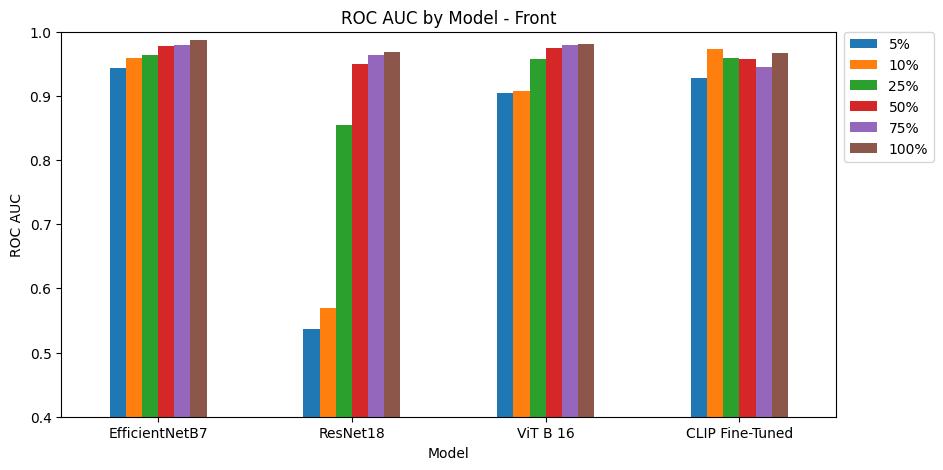

In [7]:
#ROC AUC - Front
df_front = df[df["Front/Back"] == "Front"]

ax = df_front.plot.bar(x='name', y=['5%', '10%', '25%', '50%', '75%', '100%'], rot=0, figsize=(10,5), title="Front", width=0.5)
plt.legend()
plt.xlabel("Model")
plt.ylabel("ROC AUC")
plt.title("ROC AUC by Model - Front")
plt.ylim(0.4, 1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.savefig("../Analysis_Front/Predictions by Model.png")
plt.show()

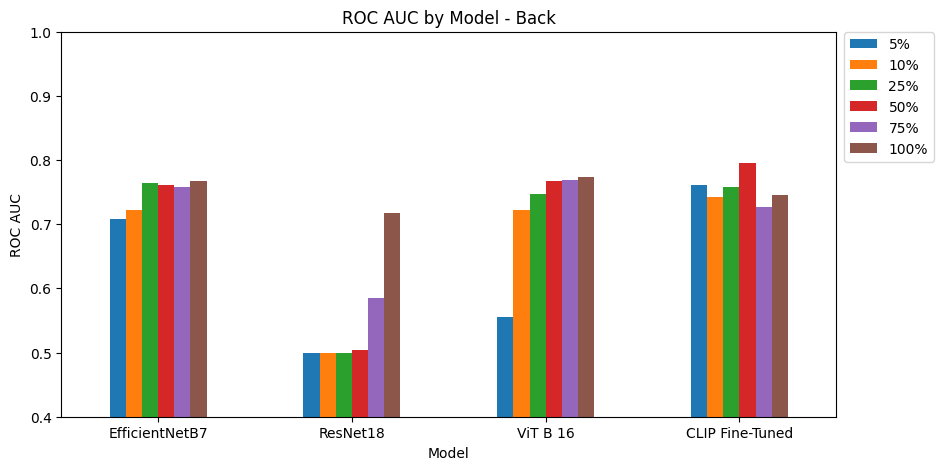

In [8]:
#ROC AUC - Back
df_back = df[df["Front/Back"] == "Back"]

ax = df_back.plot.bar(x='name', y=['5%', '10%', '25%', '50%', '75%', '100%'], rot=0, figsize=(10,5), title="Back", width=0.5)
plt.legend()
plt.xlabel("Model")
plt.ylabel("ROC AUC")
plt.title("ROC AUC by Model - Back")
plt.ylim(0.4, 1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.savefig("../Analysis_Back/Predictions by Model Back.png")
plt.show()

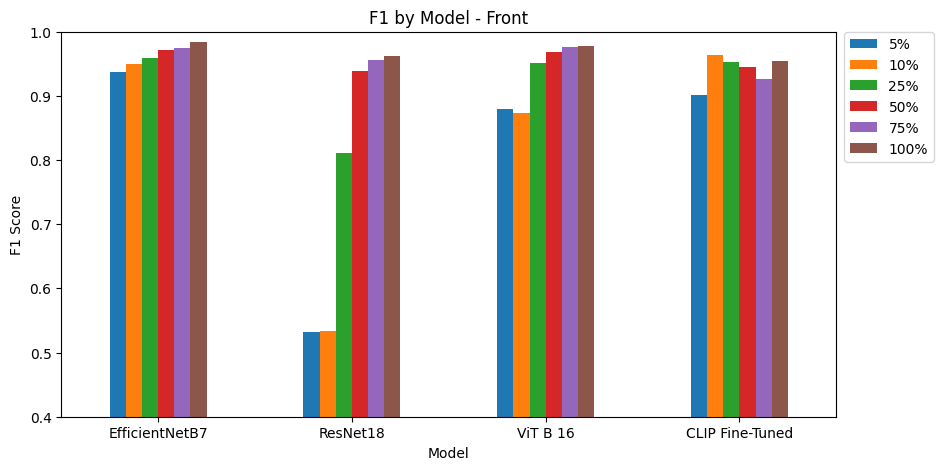

In [9]:
#F1 Score - Front
df_front = df_f1[df_f1["Front/Back"] == "Front"]
ax = df_front.plot.bar(x='name', y=['5%', '10%', '25%', '50%', '75%', '100%'], rot=0, figsize=(10,5), title="Front", width=0.5)
plt.legend()
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("F1 by Model - Front")
plt.ylim(0.4, 1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.savefig("../Analysis_Front/Predictions by Model F1.png")
plt.show()

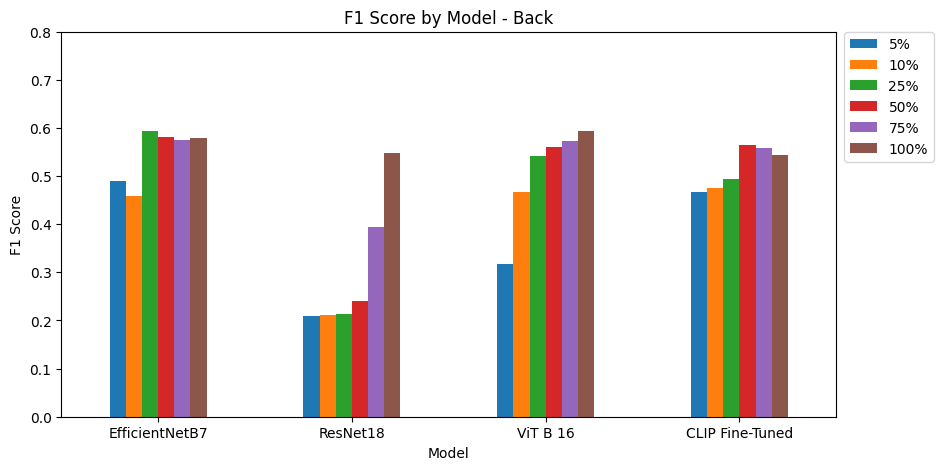

In [10]:
#F1 Score - Back
df_back = df_f1[df_f1["Front/Back"] == "Back"]
ax = df_back.plot.bar(x='name', y=['5%', '10%', '25%', '50%', '75%', '100%'], rot=0, figsize=(10,5), title="Back", width=0.5)
plt.legend()
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("F1 Score by Model - Back")
plt.ylim(0, 0.8)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.savefig("../Analysis_Back/Predictions by Model F1 Back.png")
plt.show()